In [36]:
import numpy as np
import pandas as pd

from typing import List, Tuple
import matplotlib.pyplot as plt
import math

from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [37]:
# Load the features and labels for the MNIST dataset
# This might take a minute to download the images.
fmnist_X, fmnist_y = fetch_openml(name='Fashion-MNIST', as_frame=False, return_X_y=True)

# Convert labels to integer data type
fmnist_y = fmnist_y.astype(int)

fmnist_X_tr, fmnist_X_te, fmnist_y_tr, f_mnist_y_te = train_test_split(fmnist_X, fmnist_y, test_size=0.25, random_state=1234, shuffle=True)

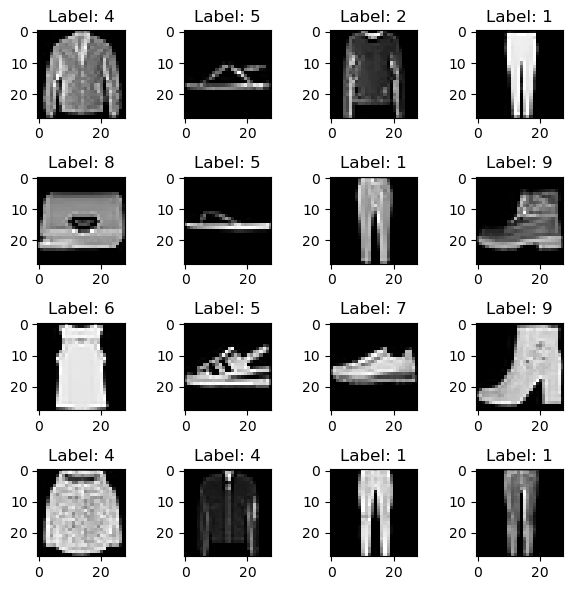

In [38]:
# Some default settings for our plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Create a figure with 4 rows and 4 columns
figure, axes = plt.subplots(4, 4, figsize=(6, 6))  

### YOUR CODE STARTS HERE ###
# Plot the first 16 images in our dataset.
# Include a title on each subplot to indicate the corresponding label.
# (≈ 5 lines of code)
for i in range(16):
    axes[i//4][i%4].imshow(fmnist_X_tr[i].reshape(28,28))
    axes[i//4, i%4].set_title(f'Label: {fmnist_y_tr[i]}')

### YOUR CODE ENDS HERE  ###

plt.tight_layout()

In [39]:
# Tim
scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_te = scaler.transform(X_te)

In [40]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_tr, y_tr)
y_pred = knn.predict(X_te)

In [41]:
accuracy = accuracy_score(y_te, y_pred)
precision = precision_score(y_te, y_pred, average='weighted')
recall = recall_score(y_te, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy: 0.8531428571428571
Precision: 0.8567805334374146
Recall: 0.8531428571428571


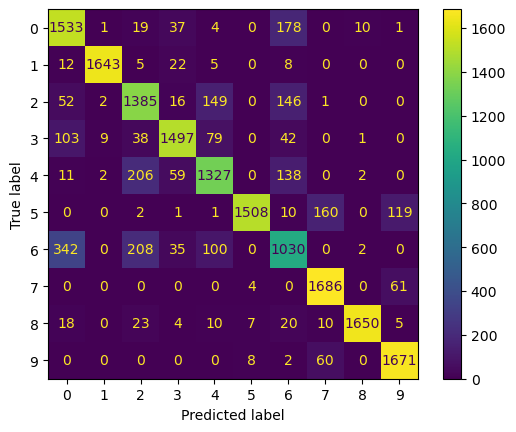

In [42]:
conf_matrix = confusion_matrix(y_te, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(fmnist_y))
disp.plot()
plt.show()

In [43]:
roc_auc = roc_auc_score(y_te, knn.predict_proba(X_te), multi_class='ovr')
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.9585254010688997


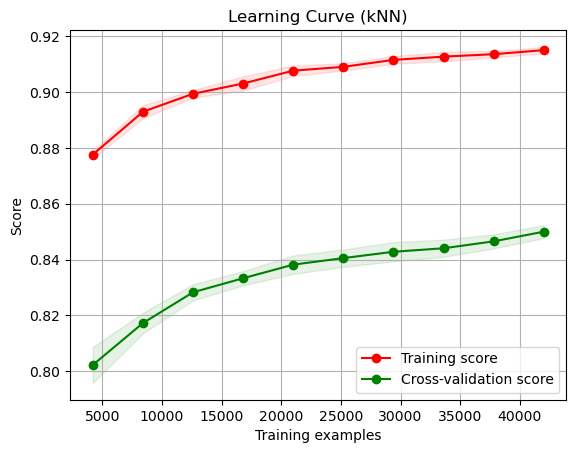

In [45]:
train_sizes, train_scores, test_scores = learning_curve(
    knn, X_tr, y_tr, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve (kNN)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()